In [1]:
%cd ~/REVIVAL2

/disk2/fli/REVIVAL2


In [2]:
%load_ext blackcellmagic
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd

from scipy.stats import spearmanr

In [16]:
common_cols = [
    "lib",
    "hd",
    "ev_score",
    "esm_score",
    "esmif_score_apo-score",
    "coves_score_apo_clean-output-100_processed",
    "Triad_score_score-frompdb-cleanup",
    "ligandmpnn_score",
    "flowsite_score",
    "dH", # "complexscore",
    "vina_apo-score-substrate_cofactor-docked",
    "var_vol",
]
common_heme_col = common_cols + [
    "chain_iptm_BA_avg_score_seperate_chai",
    "chain_pae_min_CA_avg_score_seperate_af3",
    "pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_separate",
    "num_hydrogen_bond_avg_af3-score_seperate",
    # "num_interactions_avg_af3-score_seperate"
]


common_col_dict = {
    "lib": "Library",
    "hd": "Hamming distance",
    "ev_score": "EVmutation",
    "esm_score": "ESM2",
    "esmif_score_apo-score": "ESM-IF",
    "coves_score_apo_clean-output-100_processed": "CoVES",
    "Triad_score_score-frompdb-cleanup": r"ΔΔ$G_f$",
    "ligandmpnn_score": "LigandMPNN",
    "flowsite_score": "FlowSite",
    "dH": "GALigandDock",
    # "complexscore": "GALigandock",
    "vina_apo-score-substrate_cofactor-docked": "Vina",
    "var_vol": "Active-site volume",
}
common_heme_col_dict = {
    **common_col_dict,
    "chain_iptm_BA_avg_score_seperate_chai": "Chai-1",
    "chain_pae_min_CA_avg_score_seperate_af3": "AF3",
    "pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_separate": "Hydrophobicity",
    "num_hydrogen_bond_avg_af3-score_seperate": "Hydrogen bonds",
    # "num_interactions_avg_af3-score_seperate": "PLIP",
}
trpb_cols = common_cols + [
    "chain_iptm_AB_avg_score_joint_chai",
    "chain_pae_min_BA_avg_score_joint_af3",
    "2:GLU-NH_2_avg_af3-struct_joint",
    "pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_joint",
    "num_hydrogen_bond_avg_af3-score_joint",
    # "num_interactions_avg_af3-score_joint"
]

trpb_col_dict = {
    **common_col_dict,
    "chain_iptm_AB_avg_score_joint_chai": "Chai-1",
    "chain_pae_min_BA_avg_score_joint_af3": "AF3",
    "2:GLU-NH_2_avg_af3-struct_joint": "Bond distance",
    "pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_joint": "Hydrophobicity",
    "num_hydrogen_bond_avg_af3-score_joint": "Hydrogen bonds",
    # "num_interactions_avg_af3-score_joint": "PLIP",
}

parlq_cols = common_heme_col + ["0:C-C_1_avg_af3-struct_seperate"]

parlq_col_dict = {
    **common_heme_col_dict,
    "0:C-C_1_avg_af3-struct_seperate": "Bond distance",
}

cb_col = common_heme_col + ["0:C-B_avg_af3-struct_seperate"]

cb_col_dict = {**common_heme_col_dict, "0:C-B_avg_af3-struct_seperate": "Bond distance"}

csi_col = common_heme_col + ["0:C-Si_avg_af3-struct_seperate"]
csi_col_dict = {
    **common_heme_col_dict,
    "0:C-Si_avg_af3-struct_seperate": "Bond distance",
}

final_col_order = [
    "Library",
    "Hamming distance",
    "EVmutation",
    "ESM2",
    "ESM-IF",
    "CoVES",
    r"ΔΔ$G_f$",  # "ΔΔG",
    "Vina",
    "GALigandDock",
    "AF3",
    "Chai-1",
    "LigandMPNN",
    "FlowSite",
    "Bond distance",
    "Hydrogen bonds",
    "Hydrophobicity",
    "Active-site volume",
]

In [33]:
# correlate all ZS for selectivity and fitness
df_fit = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/fit_top25.csv")
df_sele = pd.read_csv("/disk2/fli/REVIVAL2/zs/metrics/sele_top25.csv")

In [34]:
df_fit = df_fit.dropna(subset=["selectivity"]).reset_index(drop=True)
df_fit

,lib,selectivity,n_mut,hd,ev_score,esm_score,flowsite_score,flowsite_std,ligandmpnn_score,var_vol,...,0:C-Si_agg_af3-struct_joint,0:C-Si_avg_af3-struct_joint,0:C-Si_std_af3-struct_joint,0:C-Si_agg_af3-struct_seperate,0:C-Si_avg_af3-struct_seperate,0:C-Si_std_af3-struct_seperate,0:C-Si_avg_chai-struct_joint,0:C-Si_std_chai-struct_joint,0:C-Si_avg_chai-struct_seperate,0:C-Si_std_chai-struct_seperate
0,ParLQ-a,0.869919,0.918699,0.081301,0.073171,0.081301,0.170732,0.699187,0.073171,0.121951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ParLQ-b,0.652174,0.913043,1.000000,0.652174,0.130435,0.217391,0.304348,0.086957,0.347826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ParLQ-c,0.826087,0.782609,1.000000,0.782609,0.260870,0.130435,0.304348,0.130435,0.304348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ParLQ-d,0.739130,0.869565,1.000000,0.608696,0.130435,0.347826,0.260870,0.347826,0.391304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ParLQ-e,0.739130,0.826087,1.000000,0.521739,0.217391,0.347826,0.304348,0.260870,0.347826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ParLQ-f,0.826087,0.869565,1.000000,0.782609,0.173913,0.217391,0.217391,0.130435,0.260870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ParLQ-g,0.521739,0.826087,1.000000,0.565217,0.217391,0.347826,0.304348,0.304348,0.260870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ParLQ-h,0.739130,0.913043,1.000000,0.521739,0.130435,0.217391,0.217391,0.130435,0.347826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ParLQ-i,0.608696,1.000000,1.000000,0.434783,0.000000,0.086957,0.173913,0.043478,0.478261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Rma-CB,0.605263,0.631579,0.368421,0.315789,0.263158,0.315789,0.157895,0.368421,0.184211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_fit = df_fit[[c for c in common_heme_col + ["0:C-C_1_avg_af3-struct_seperate", "0:C-B_avg_af3-struct_seperate", "0:C-Si_avg_af3-struct_seperate"]]]
df_fit

,lib,hd,ev_score,esm_score,esmif_score_apo-score,coves_score_apo_clean-output-100_processed,Triad_score_score-frompdb-cleanup,ligandmpnn_score,flowsite_score,dH,vina_apo-score-substrate_cofactor-docked,var_vol,chain_iptm_BA_avg_score_seperate_chai,chain_pae_min_CA_avg_score_seperate_af3,pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_separate,num_hydrogen_bond_avg_af3-score_seperate,0:C-C_1_avg_af3-struct_seperate,0:C-B_avg_af3-struct_seperate,0:C-Si_avg_af3-struct_seperate
0,ParLQ-a,0.081301,0.073171,0.081301,0.113821,0.040650,0.121951,0.073171,0.170732,0.439024,0.308943,0.121951,0.178862,0.447154,0.219512,0.341463,0.243902,NaN,NaN
1,ParLQ-b,1.000000,0.652174,0.130435,0.260870,0.130435,0.260870,0.086957,0.217391,0.260870,0.260870,0.347826,0.217391,0.347826,0.217391,0.304348,0.260870,NaN,NaN
2,ParLQ-c,1.000000,0.782609,0.260870,0.260870,0.130435,0.217391,0.130435,0.130435,0.478261,0.260870,0.304348,0.304348,0.304348,0.217391,0.478261,0.173913,NaN,NaN
3,ParLQ-d,1.000000,0.608696,0.130435,0.217391,0.217391,0.217391,0.347826,0.347826,0.434783,0.260870,0.391304,0.304348,0.304348,0.217391,0.391304,0.217391,NaN,NaN
4,ParLQ-e,1.000000,0.521739,0.217391,0.347826,0.347826,0.217391,0.260870,0.347826,0.217391,0.217391,0.347826,0.260870,0.304348,0.260870,0.478261,0.260870,NaN,NaN
5,ParLQ-f,1.000000,0.782609,0.173913,0.260870,0.217391,0.217391,0.130435,0.217391,0.217391,0.304348,0.260870,0.304348,0.347826,0.173913,0.434783,0.173913,NaN,NaN
6,ParLQ-g,1.000000,0.565217,0.217391,0.217391,0.217391,0.347826,0.304348,0.347826,0.304348,0.217391,0.260870,0.260870,0.304348,0.173913,0.304348,0.217391,NaN,NaN
7,ParLQ-h,1.000000,0.521739,0.130435,0.260870,0.260870,0.173913,0.130435,0.217391,0.130435,0.260870,0.347826,0.217391,0.391304,0.086957,0.347826,0.260870,NaN,NaN
8,ParLQ-i,1.000000,0.434783,0.000000,0.130435,0.086957,0.173913,0.043478,0.086957,0.217391,0.217391,0.478261,0.304348,0.347826,0.043478,0.217391,0.217391,NaN,NaN
9,Rma-CB,0.368421,0.315789,0.263158,0.342105,0.289474,0.368421,0.368421,0.315789,0.315789,0.236842,0.184211,0.315789,0.421053,0.368421,0.526316,NaN,0.131579,NaN


In [36]:
df_fit['merged_column'] = df_fit.iloc[:, -1].fillna(df_fit.iloc[:, -2]).fillna(df_fit.iloc[:, -3])
df_fit

/tmp/ipykernel_759479/3036296732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fit['merged_column'] = df_fit.iloc[:, -1].fillna(df_fit.iloc[:, -2]).fillna(df_fit.iloc[:, -3])


,lib,hd,ev_score,esm_score,esmif_score_apo-score,coves_score_apo_clean-output-100_processed,Triad_score_score-frompdb-cleanup,ligandmpnn_score,flowsite_score,dH,vina_apo-score-substrate_cofactor-docked,var_vol,chain_iptm_BA_avg_score_seperate_chai,chain_pae_min_CA_avg_score_seperate_af3,pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_separate,num_hydrogen_bond_avg_af3-score_seperate,0:C-C_1_avg_af3-struct_seperate,0:C-B_avg_af3-struct_seperate,0:C-Si_avg_af3-struct_seperate,merged_column
0,ParLQ-a,0.081301,0.073171,0.081301,0.113821,0.040650,0.121951,0.073171,0.170732,0.439024,0.308943,0.121951,0.178862,0.447154,0.219512,0.341463,0.243902,NaN,NaN,0.243902
1,ParLQ-b,1.000000,0.652174,0.130435,0.260870,0.130435,0.260870,0.086957,0.217391,0.260870,0.260870,0.347826,0.217391,0.347826,0.217391,0.304348,0.260870,NaN,NaN,0.260870
2,ParLQ-c,1.000000,0.782609,0.260870,0.260870,0.130435,0.217391,0.130435,0.130435,0.478261,0.260870,0.304348,0.304348,0.304348,0.217391,0.478261,0.173913,NaN,NaN,0.173913
3,ParLQ-d,1.000000,0.608696,0.130435,0.217391,0.217391,0.217391,0.347826,0.347826,0.434783,0.260870,0.391304,0.304348,0.304348,0.217391,0.391304,0.217391,NaN,NaN,0.217391
4,ParLQ-e,1.000000,0.521739,0.217391,0.347826,0.347826,0.217391,0.260870,0.347826,0.217391,0.217391,0.347826,0.260870,0.304348,0.260870,0.478261,0.260870,NaN,NaN,0.260870
5,ParLQ-f,1.000000,0.782609,0.173913,0.260870,0.217391,0.217391,0.130435,0.217391,0.217391,0.304348,0.260870,0.304348,0.347826,0.173913,0.434783,0.173913,NaN,NaN,0.173913
6,ParLQ-g,1.000000,0.565217,0.217391,0.217391,0.217391,0.347826,0.304348,0.347826,0.304348,0.217391,0.260870,0.260870,0.304348,0.173913,0.304348,0.217391,NaN,NaN,0.217391
7,ParLQ-h,1.000000,0.521739,0.130435,0.260870,0.260870,0.173913,0.130435,0.217391,0.130435,0.260870,0.347826,0.217391,0.391304,0.086957,0.347826,0.260870,NaN,NaN,0.260870
8,ParLQ-i,1.000000,0.434783,0.000000,0.130435,0.086957,0.173913,0.043478,0.086957,0.217391,0.217391,0.478261,0.304348,0.347826,0.043478,0.217391,0.217391,NaN,NaN,0.217391
9,Rma-CB,0.368421,0.315789,0.263158,0.342105,0.289474,0.368421,0.368421,0.315789,0.315789,0.236842,0.184211,0.315789,0.421053,0.368421,0.526316,NaN,0.131579,NaN,0.131579


In [37]:
df_fit = df_fit.drop(columns=["0:C-C_1_avg_af3-struct_seperate", "0:C-B_avg_af3-struct_seperate", "0:C-Si_avg_af3-struct_seperate"])
df_fit

,lib,hd,ev_score,esm_score,esmif_score_apo-score,coves_score_apo_clean-output-100_processed,Triad_score_score-frompdb-cleanup,ligandmpnn_score,flowsite_score,dH,vina_apo-score-substrate_cofactor-docked,var_vol,chain_iptm_BA_avg_score_seperate_chai,chain_pae_min_CA_avg_score_seperate_af3,pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_separate,num_hydrogen_bond_avg_af3-score_seperate,merged_column
0,ParLQ-a,0.081301,0.073171,0.081301,0.113821,0.040650,0.121951,0.073171,0.170732,0.439024,0.308943,0.121951,0.178862,0.447154,0.219512,0.341463,0.243902
1,ParLQ-b,1.000000,0.652174,0.130435,0.260870,0.130435,0.260870,0.086957,0.217391,0.260870,0.260870,0.347826,0.217391,0.347826,0.217391,0.304348,0.260870
2,ParLQ-c,1.000000,0.782609,0.260870,0.260870,0.130435,0.217391,0.130435,0.130435,0.478261,0.260870,0.304348,0.304348,0.304348,0.217391,0.478261,0.173913
3,ParLQ-d,1.000000,0.608696,0.130435,0.217391,0.217391,0.217391,0.347826,0.347826,0.434783,0.260870,0.391304,0.304348,0.304348,0.217391,0.391304,0.217391
4,ParLQ-e,1.000000,0.521739,0.217391,0.347826,0.347826,0.217391,0.260870,0.347826,0.217391,0.217391,0.347826,0.260870,0.304348,0.260870,0.478261,0.260870
5,ParLQ-f,1.000000,0.782609,0.173913,0.260870,0.217391,0.217391,0.130435,0.217391,0.217391,0.304348,0.260870,0.304348,0.347826,0.173913,0.434783,0.173913
6,ParLQ-g,1.000000,0.565217,0.217391,0.217391,0.217391,0.347826,0.304348,0.347826,0.304348,0.217391,0.260870,0.260870,0.304348,0.173913,0.304348,0.217391
7,ParLQ-h,1.000000,0.521739,0.130435,0.260870,0.260870,0.173913,0.130435,0.217391,0.130435,0.260870,0.347826,0.217391,0.391304,0.086957,0.347826,0.260870
8,ParLQ-i,1.000000,0.434783,0.000000,0.130435,0.086957,0.173913,0.043478,0.086957,0.217391,0.217391,0.478261,0.304348,0.347826,0.043478,0.217391,0.217391
9,Rma-CB,0.368421,0.315789,0.263158,0.342105,0.289474,0.368421,0.368421,0.315789,0.315789,0.236842,0.184211,0.315789,0.421053,0.368421,0.526316,0.131579


In [38]:
# do the same for df_sele
df_sele = df_sele[[c for c in common_heme_col + ["0:C-C_1_avg_af3-struct_seperate", "0:C-B_avg_af3-struct_seperate", "0:C-Si_avg_af3-struct_seperate"]]]
df_sele['merged_column'] = df_sele.iloc[:, -1].fillna(df_sele.iloc[:, -2]).fillna(df_sele.iloc[:, -3])
df_sele = df_sele.drop(columns=["0:C-C_1_avg_af3-struct_seperate", "0:C-B_avg_af3-struct_seperate", "0:C-Si_avg_af3-struct_seperate"])
df_sele

,lib,hd,ev_score,esm_score,esmif_score_apo-score,coves_score_apo_clean-output-100_processed,Triad_score_score-frompdb-cleanup,ligandmpnn_score,flowsite_score,dH,vina_apo-score-substrate_cofactor-docked,var_vol,chain_iptm_BA_avg_score_seperate_chai,chain_pae_min_CA_avg_score_seperate_af3,pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_separate,num_hydrogen_bond_avg_af3-score_seperate,merged_column
0,ParLQ-a,0.097561,0.097561,0.097561,0.130081,0.065041,0.146341,0.097561,0.252033,0.406504,0.308943,0.121951,0.162602,0.439024,0.203252,0.365854,0.292683
1,ParLQ-b,1.000000,0.652174,0.173913,0.304348,0.260870,0.217391,0.173913,0.304348,0.173913,0.260870,0.260870,0.260870,0.260870,0.130435,0.347826,0.086957
2,ParLQ-c,1.000000,0.695652,0.173913,0.260870,0.217391,0.173913,0.130435,0.217391,0.521739,0.260870,0.347826,0.260870,0.347826,0.217391,0.391304,0.217391
3,ParLQ-d,1.000000,0.565217,0.130435,0.260870,0.304348,0.260870,0.391304,0.391304,0.391304,0.304348,0.347826,0.217391,0.391304,0.217391,0.434783,0.217391
4,ParLQ-e,1.000000,0.478261,0.173913,0.304348,0.304348,0.217391,0.304348,0.304348,0.217391,0.217391,0.347826,0.260870,0.304348,0.173913,0.521739,0.130435
5,ParLQ-f,1.000000,0.695652,0.173913,0.304348,0.260870,0.217391,0.217391,0.260870,0.173913,0.347826,0.304348,0.260870,0.434783,0.260870,0.391304,0.217391
6,ParLQ-g,1.000000,0.652174,0.217391,0.347826,0.347826,0.260870,0.347826,0.304348,0.304348,0.086957,0.260870,0.304348,0.347826,0.130435,0.347826,0.173913
7,ParLQ-h,1.000000,0.608696,0.173913,0.304348,0.260870,0.217391,0.217391,0.260870,0.173913,0.304348,0.260870,0.173913,0.478261,0.173913,0.347826,0.260870
8,ParLQ-i,1.000000,0.652174,0.043478,0.173913,0.130435,0.173913,0.086957,0.086957,0.173913,0.260870,0.391304,0.130435,0.434783,0.217391,0.391304,0.086957
9,Rma-CB,0.410256,0.358974,0.358974,0.307692,0.307692,0.307692,0.461538,0.384615,0.410256,0.307692,0.128205,0.230769,0.461538,0.230769,0.564103,0.102564


In [39]:
for c in df_fit.columns:

    if c in df_sele.columns and c != "lib":
        print(f"Correlating {c}")
        rho, pval = spearmanr(df_fit[c], df_sele[c])
        print(f"rho: {rho}, pval: {pval}")

Correlating hd
rho: 1.0, pval: 0.0
Correlating ev_score
rho: 0.8637620712466738, pval: 0.000609275922289557
Correlating esm_score
rho: 0.8535697952416293, pval: 0.0008300836464492344
Correlating esmif_score_apo-score
rho: 0.5956937799043063, pval: 0.05313565670633473
Correlating coves_score_apo_clean-output-100_processed
rho: 0.7488372093023257, pval: 0.008003397472934753
Correlating Triad_score_score-frompdb-cleanup
rho: 0.8249424200024326, pval: 0.0017748735006990419
Correlating ligandmpnn_score
rho: 0.9747358243539002, pval: 3.655130747364526e-07
Correlating flowsite_score
rho: 0.8805837945470923, pval: 0.0003453342666223937
Correlating dH
rho: 0.8028965419920907, pval: 0.0029258588997396143
Correlating vina_apo-score-substrate_cofactor-docked
rho: 0.8125372318961332, pval: 0.0023697440339525287
Correlating var_vol
rho: 0.7775367547596667, pval: 0.004849477081149086
Correlating chain_iptm_BA_avg_score_seperate_chai
rho: 0.0047847437646934545, pval: 0.9888604118703297
Correlating cha

In [28]:
df_fit["chain_pae_min_CA_avg_score_seperate_af3"]

0     0.356036
1     0.193525
2     0.256742
3     0.365860
4     0.335681
5     0.278623
6     0.289401
7     0.275381
8     0.283123
9     0.362757
10    0.397210
Name: chain_pae_min_CA_avg_score_seperate_af3, dtype: float64

In [29]:
import matplotlib.pyplot as plt

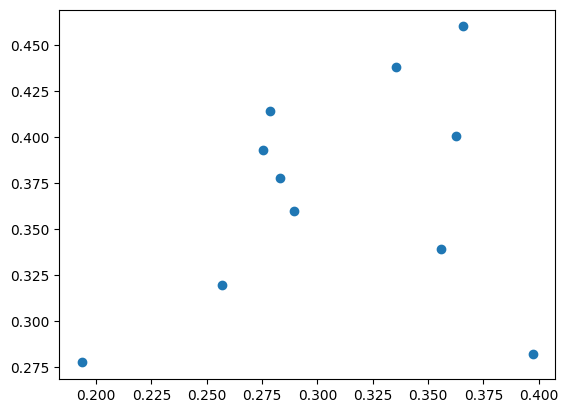

In [30]:
plt.scatter(df_fit["chain_pae_min_CA_avg_score_seperate_af3"], df_sele["chain_pae_min_CA_avg_score_seperate_af3"])

In [31]:
spearmanr(df_fit["chain_pae_min_CA_avg_score_seperate_af3"], df_sele["chain_pae_min_CA_avg_score_seperate_af3"])

SignificanceResult(statistic=0.3090909090909091, pvalue=0.3550284397015071)